# **Data Cleaning**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from kaggle.api.kaggle_api_extended import KaggleApi
import shutil
import os

# Initialize and authenticate
api = KaggleApi()
api.authenticate()

# Dataset identifier (from kaggle URL: 'aryashah2k/credit-card-customer-data')
dataset = 'aryashah2k/credit-card-customer-data'

# Download and unzip dataset to specified folder
download_path = './datasets'  # you can change this

api.dataset_download_files(dataset, path=download_path, unzip=True)

print("Dataset downloaded to:", download_path)

src = os.path.join(download_path, 'Credit Card Customer Data.csv')
dst = os.path.join('..', 'content', 'Credit Card Customer Data.csv')

# Make sure destination folder exists
os.makedirs(os.path.dirname(dst), exist_ok=True)

# Move the file if it exists
if os.path.exists(src):
    shutil.move(src, dst)
    print(f"Moved dataset file to {dst}")
else:
    print(f"Source file {src} does not exist!")


OSError: Could not find kaggle.json. Make sure it's located in C:\Users\Dito\.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import joblib

In [ ]:
path = "../content/Credit Card Customer Data.csv"
df = pd.read_csv(path)
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [ ]:
df.isna().sum()

,0
Sl_No,0
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


In [ ]:
duplicate_customer_keys = df[df['Customer Key'].isin(df['Customer Key'][df['Customer Key'].duplicated()])].sort_values(by=['Customer Key'])
duplicate_customer_keys

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2
332,333,47437,17000,7,3,1,0
4,5,47437,100000,6,0,12,3
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


In [ ]:
df.drop_duplicates(subset=['Customer Key'], inplace=True)
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


# **EDA**

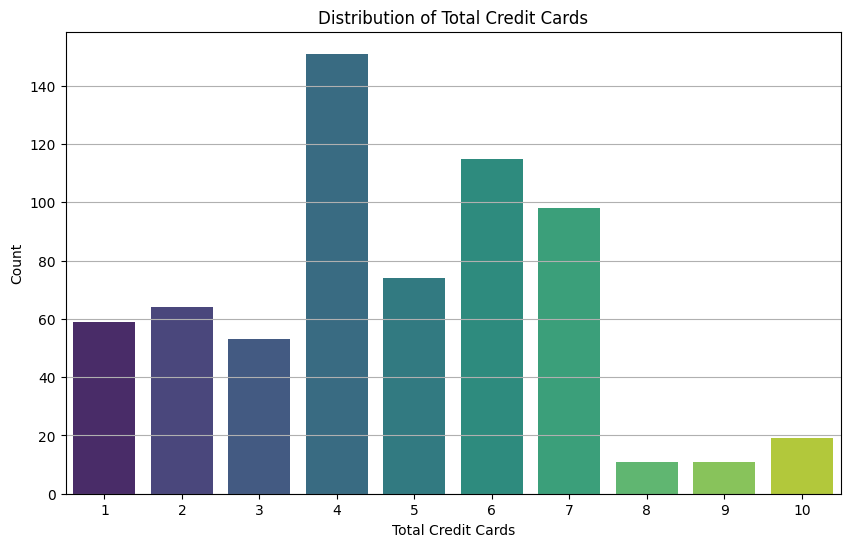

In [ ]:
credit_card_counts = df['Total_Credit_Cards'].value_counts().reset_index()
credit_card_counts.columns = ['Total_Credit_Cards', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Credit_Cards', y='Count', data=credit_card_counts, palette='viridis')
plt.xlabel('Total Credit Cards')
plt.ylabel('Count')
plt.title('Distribution of Total Credit Cards')
plt.grid(axis='y')
plt.show()

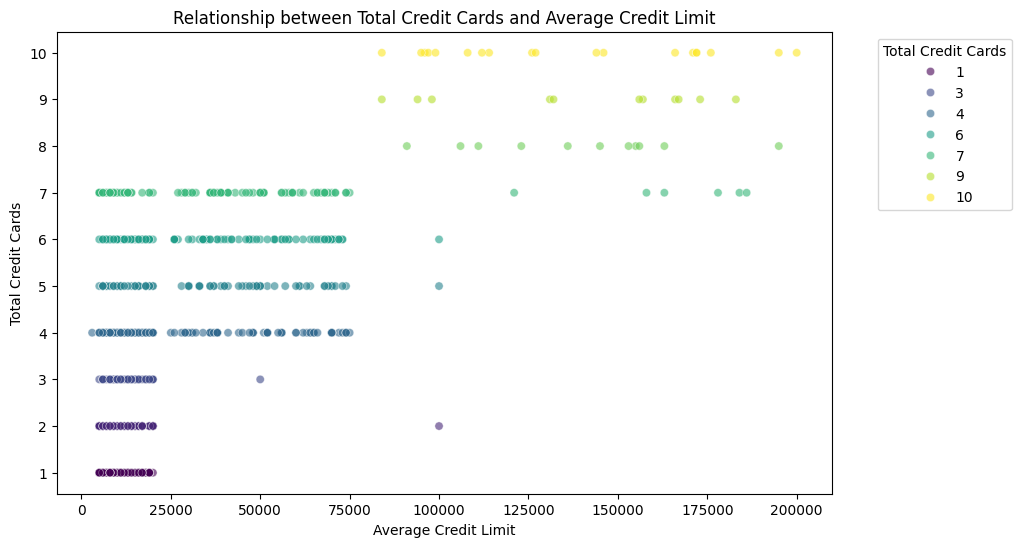

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='Avg_Credit_Limit',
    y='Total_Credit_Cards',
    data=df,
    hue='Total_Credit_Cards',
    palette='viridis',
    alpha=0.6
)

plt.xlabel('Average Credit Limit')
plt.ylabel('Total Credit Cards')
plt.yticks(range(1, 11))
plt.title('Relationship between Total Credit Cards and Average Credit Limit')

plt.legend(title='Total Credit Cards', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

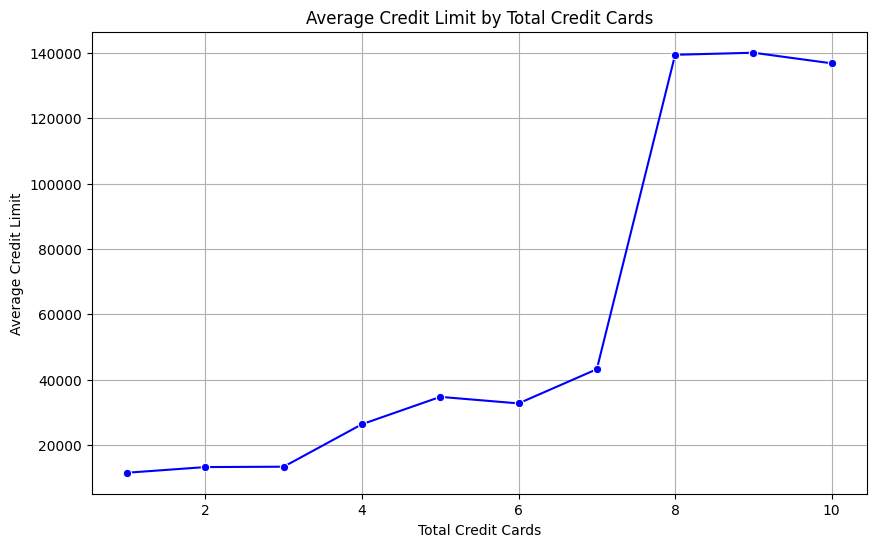

In [ ]:
avg_limit_by_credit_cards = df.groupby('Total_Credit_Cards', as_index=False)['Avg_Credit_Limit'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Total_Credit_Cards', y='Avg_Credit_Limit', data=avg_limit_by_credit_cards, marker='o', color='b')
plt.xlabel('Total Credit Cards')
plt.ylabel('Average Credit Limit')
plt.title('Average Credit Limit by Total Credit Cards')
plt.grid(True)
plt.show()


In [ ]:
df['Total_Interactions'] = df['Total_visits_bank'] + df['Total_visits_online'] + df['Total_calls_made']
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Total_Interactions
0,1,87073,100000,2,1,1,0,2
1,2,38414,50000,3,0,10,9,19
2,3,17341,50000,7,1,3,4,8
3,4,40496,30000,5,1,1,4,6
4,5,47437,100000,6,0,12,3,15
...,...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0,11
656,657,60732,84000,10,1,13,2,16
657,658,53834,145000,8,1,9,1,11
658,659,80655,172000,10,1,15,0,16


# **Preprocessing**

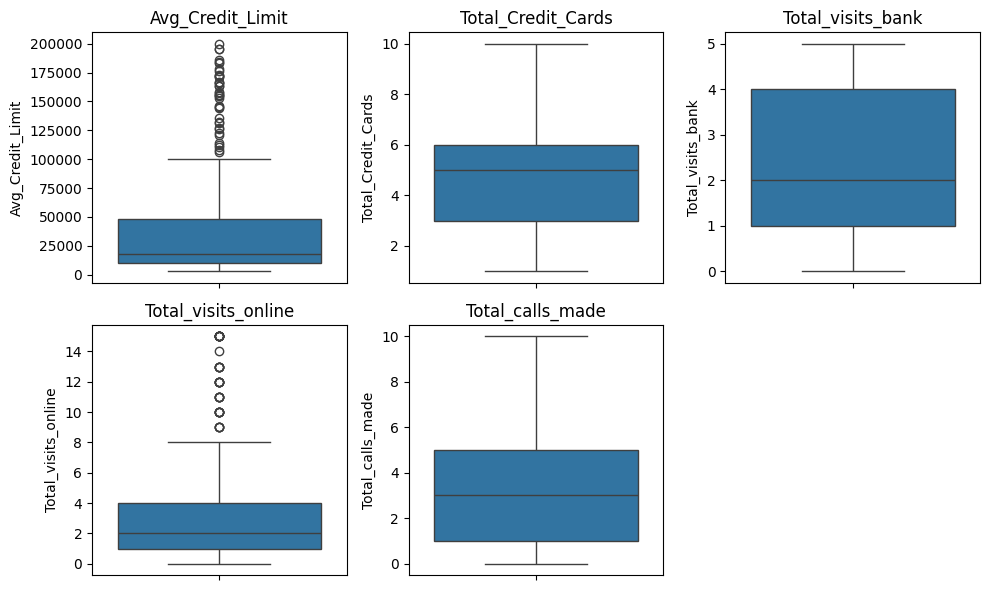

In [ ]:
plt.figure(figsize=(10,6))

columns = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

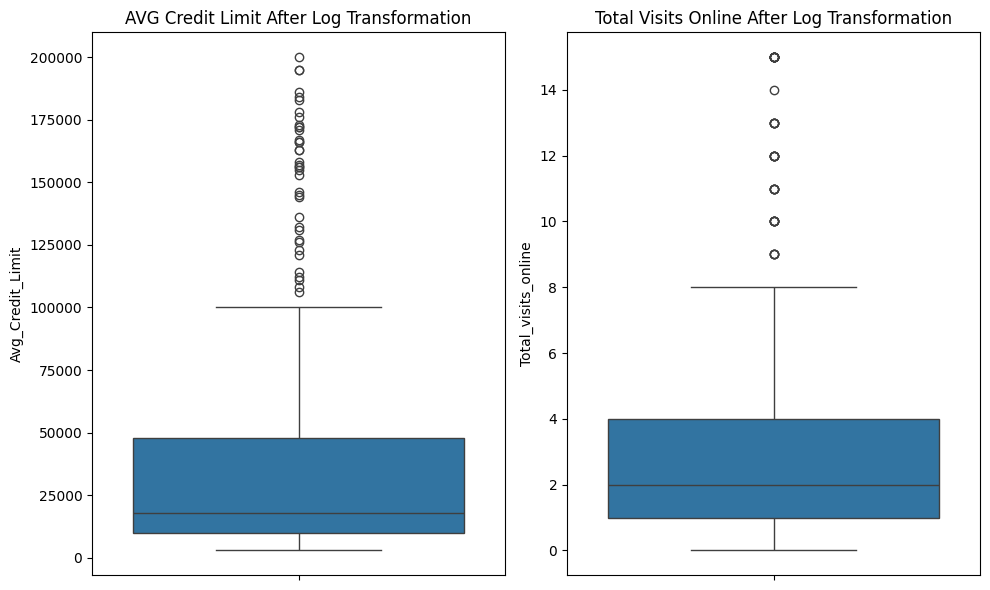

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
sns.boxplot(df['Avg_Credit_Limit'])
plt.title('AVG Credit Limit After Log Transformation')
plt.subplot(1, 2, 2)
sns.boxplot(df['Total_visits_online'])
plt.title('Total Visits Online After Log Transformation')
plt.tight_layout()
plt.show()

In [ ]:
scaler = MinMaxScaler()
df[columns] = scaler.fit_transform(df[columns])

print(df.head())
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df[columns] = scaler.fit_transform(df[columns])

   Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073          0.492386            0.111111   
1      2         38414          0.238579            0.222222   
2      3         17341          0.238579            0.666667   
3      4         40496          0.137056            0.444444   
4      5         47437          0.492386            0.555556   

   Total_visits_bank  Total_visits_online  Total_calls_made  \
0                0.2             0.066667               0.0   
1                0.0             0.666667               0.9   
2                0.2             0.200000               0.4   
3                0.2             0.066667               0.4   
4                0.0             0.800000               0.3   

   Total_Interactions  
0                   2  
1                  19  
2                   8  
3                   6  
4                  15  


<Figure size 1000x600 with 0 Axes>

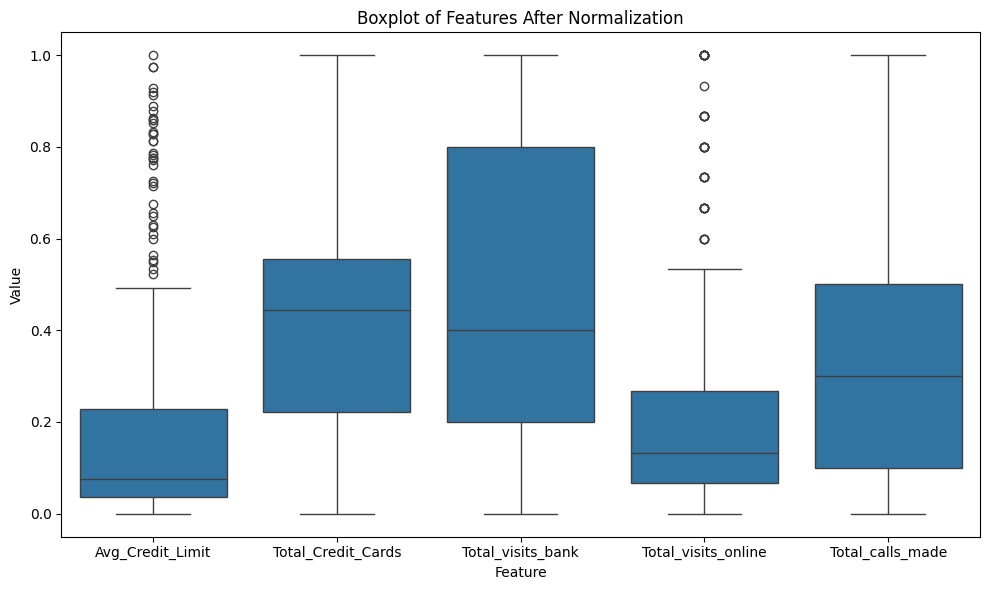

In [ ]:
plt.figure(figsize=(10,6))

columns = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
df_melted = df.melt(value_vars=columns, var_name="Feature", value_name="Value")

plt.figure(figsize=(10,6))
sns.boxplot(x="Feature", y="Value", data=df_melted)
plt.title("Boxplot of Features After Normalization")
plt.tight_layout()
plt.show()

# **Modelling**

In [ ]:
X = df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']]
X

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0.492386,0.111111,0.2,0.066667,0.0
1,0.238579,0.222222,0.0,0.666667,0.9
2,0.238579,0.666667,0.2,0.200000,0.4
3,0.137056,0.444444,0.2,0.066667,0.4
4,0.492386,0.555556,0.0,0.800000,0.3
...,...,...,...,...,...
655,0.487310,1.000000,0.2,0.666667,0.0
656,0.411168,1.000000,0.2,0.866667,0.2
657,0.720812,0.777778,0.2,0.600000,0.1
658,0.857868,1.000000,0.2,1.000000,0.0


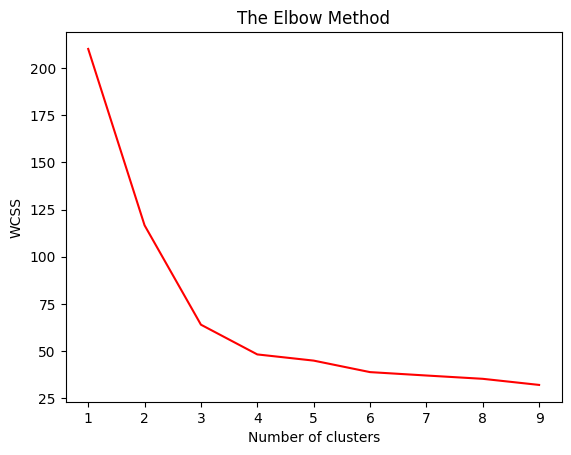

In [ ]:
from sklearn.cluster import KMeans
wcss=[]

# asumsi jumlah K berada di antara 1 sampai 10
for i in range(1,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss, color = 'red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)
joblib.dump(kmeans, 'kmeans_model.pkl')
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
df['cluster'] = labels
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Total_Interactions,cluster
0,1,87073,0.492386,0.111111,0.2,0.066667,0.0,2,0
1,2,38414,0.238579,0.222222,0.0,0.666667,0.9,19,1
2,3,17341,0.238579,0.666667,0.2,0.200000,0.4,8,0
3,4,40496,0.137056,0.444444,0.2,0.066667,0.4,6,1
4,5,47437,0.492386,0.555556,0.0,0.800000,0.3,15,2
...,...,...,...,...,...,...,...,...,...
655,656,51108,0.487310,1.000000,0.2,0.666667,0.0,11,2
656,657,60732,0.411168,1.000000,0.2,0.866667,0.2,16,2
657,658,53834,0.720812,0.777778,0.2,0.600000,0.1,11,2
658,659,80655,0.857868,1.000000,0.2,1.000000,0.0,16,2


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5256970040964366


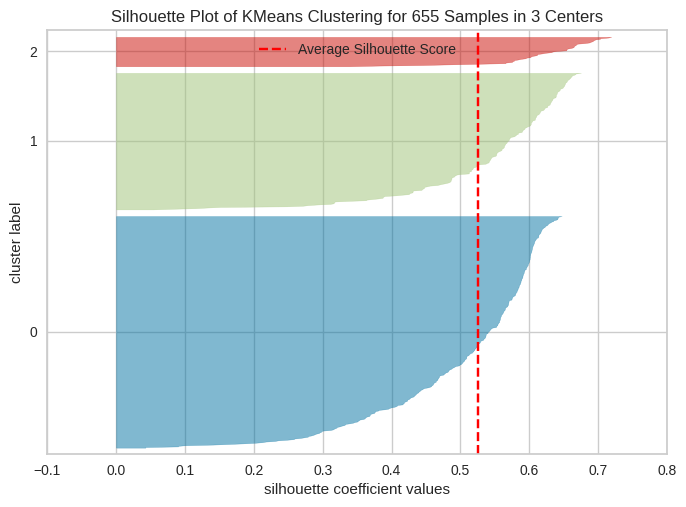

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 655 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
kmeans=KMeans(n_clusters = 3, init = 'k-means++', random_state = 0) #Initialising
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

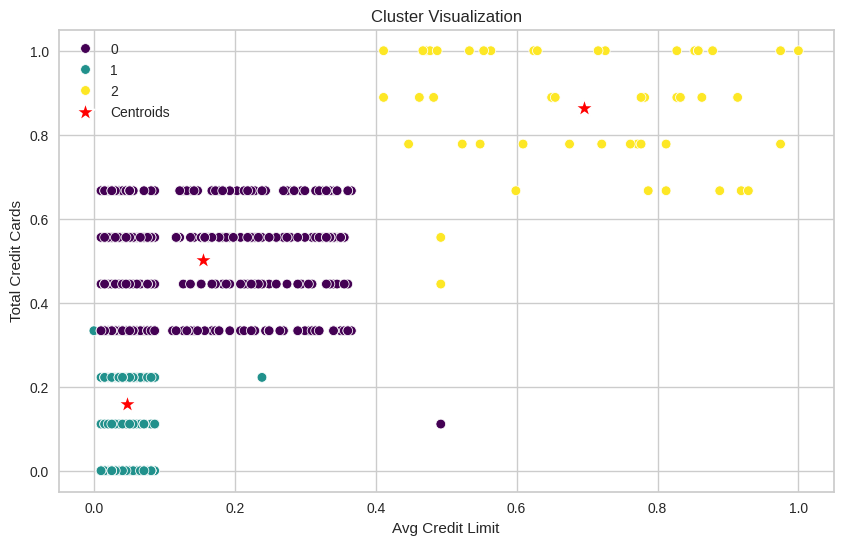

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Avg_Credit_Limit'], y=df['Total_Credit_Cards'], hue=df['cluster'], palette='viridis')
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], c='red', marker='*', s=200, label='Centroids')
plt.xlabel('Avg Credit Limit')
plt.ylabel('Total Credit Cards')
plt.title('Cluster Visualization')
plt.legend()
plt.show()


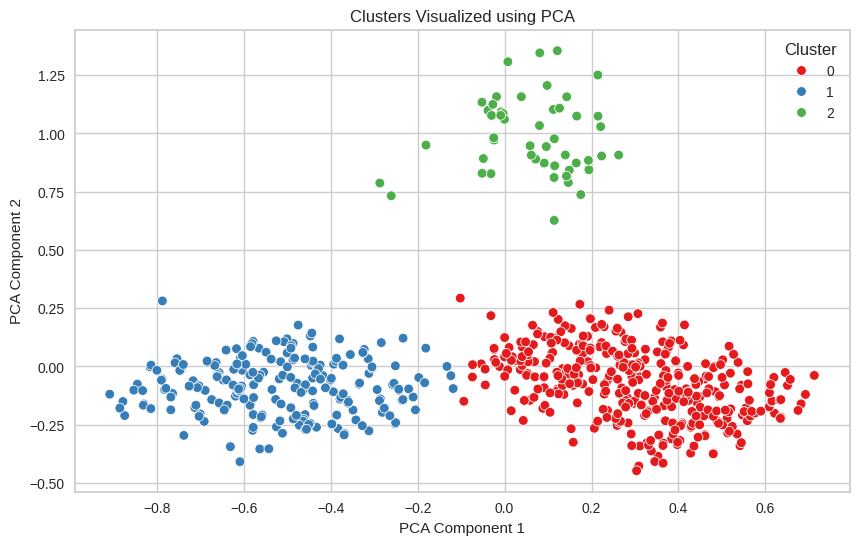

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']])

plt.figure(figsize=(10,6))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=df['cluster'], palette='Set1')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualized using PCA')
plt.legend(title='Cluster')
plt.show()

In [ ]:
print(pd.DataFrame(pca.components_, columns=['Avg_Credit_Limit', 'Total_Credit_Cards',
                                             'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
                   index=['PCA Component 1', 'PCA Component 2']))

                 Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
PCA Component 1          0.125122            0.399012           0.664969   
PCA Component 2          0.501559            0.446416          -0.488367   

                 Total_visits_online  Total_calls_made  
PCA Component 1            -0.165364         -0.596326  
PCA Component 2             0.484755         -0.275065  
